## Laptop Exploratory Data Anaylsis

We've done some of the initial clean-up on the data and scratched the surface of what can be done with our data.

We will start by looking for any numerical outliers as well as plotting out some basic information from our data. Based on these plots and the domain knowledge we have, we will beging to make a plan as to how we wish to further analyze the data. 

The goal of this EDA is to understand how different features relate to each other and begin to consider which key features we would like to pursue first in our analysis of the data. At the end of this report, we should have a good understanding of how the laptop data is distributed.

To begin with, we ended up with some data columns that are categorical and some that are numerical. Lets first explore the categorical data and then explore the numerical data.

In [1]:
#As always, we begin with our imports.
#We will be importing pandas and numpy for our numerical analysis
#We will be importing pyplot and seaborn in order to visualize our data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
import os


In [31]:
#Loading our data
#First column is our indices so read that in to avoid duplicate
laptop_df = pd.read_csv('./dataset/tim_laptop_cleaned.csv', index_col = 0)

In [32]:
#Lets remind ourselves what data we have and explore the data
laptop_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   brand            896 non-null    object 
 1   model            896 non-null    object 
 2   processor_brand  896 non-null    object 
 3   processor_name   896 non-null    object 
 4   processor_gnrtn  896 non-null    object 
 5   ram_gb           896 non-null    int64  
 6   ram_type         896 non-null    object 
 7   ssd_gb           896 non-null    int64  
 8   hdd_gb           896 non-null    int64  
 9   os               896 non-null    object 
 10  os_bit           896 non-null    int64  
 11  graphic_card_gb  896 non-null    int64  
 12  weight           896 non-null    object 
 13  display_size     896 non-null    object 
 14  warranty         896 non-null    int64  
 15  msoffice         896 non-null    object 
 16  latest_price     896 non-null    float64
dtypes: float64(1), i

In [95]:
laptop_df.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,display_size,warranty,msoffice,latest_price
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4,DDR4,0,1024,Windows,64,0,ThinNlight,Missing,0,No,324.87
1,Lenovo,Ideapad,AMD,APU Dual,10th,4,DDR4,0,512,Windows,64,0,Casual,Missing,0,No,254.67
2,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64,0,ThinNlight,Missing,0,No,259.87
3,Avita,PURA,AMD,APU Dual,10th,4,DDR4,128,0,Windows,64,0,ThinNlight,Missing,0,No,279.37
4,Avita,PURA,AMD,APU Dual,10th,4,DDR4,256,0,Windows,64,0,ThinNlight,Missing,0,No,324.87


## Initial Thoughts

So we have a mixture of string and numerical data. Lets look at our data and see what information we can glean from it. We did some of this already during our data wrangling so lets just make sure we put it in here and take a second look at it. 

The plan here is to first get counts of the data and look at the distribution of values that we have. Then we will see how these features correlate/compare to our target variable: `latest_price` and see if there are any initial insights that we can make from a simple 2-D analysis of the data.

We will start with bar charts. First, we will not include `latest_price` because it is our target and it just doesn't make sense to include latest price in our bar charts. We wil create a bar chart for `model` separately as it is such a large chart and requires more space.

In [88]:
#Create a function that can count our columns for us and input our target columns
#Brand will be a separate bar-chart that we will explore later as we noted in the data wrangling it was a large chart.

def count_column(df,col_list):
    count = {}
    for elem in col_list:
        count[elem] = df[elem].value_counts()
    return count


#We will drop 'latest_price' and 'model' for the reasons above
columns_to_count = laptop_df.columns
columns_to_count = columns_to_count.drop(['latest_price','model'])
laptop_string_counts = count_column(laptop_df, columns_to_count)

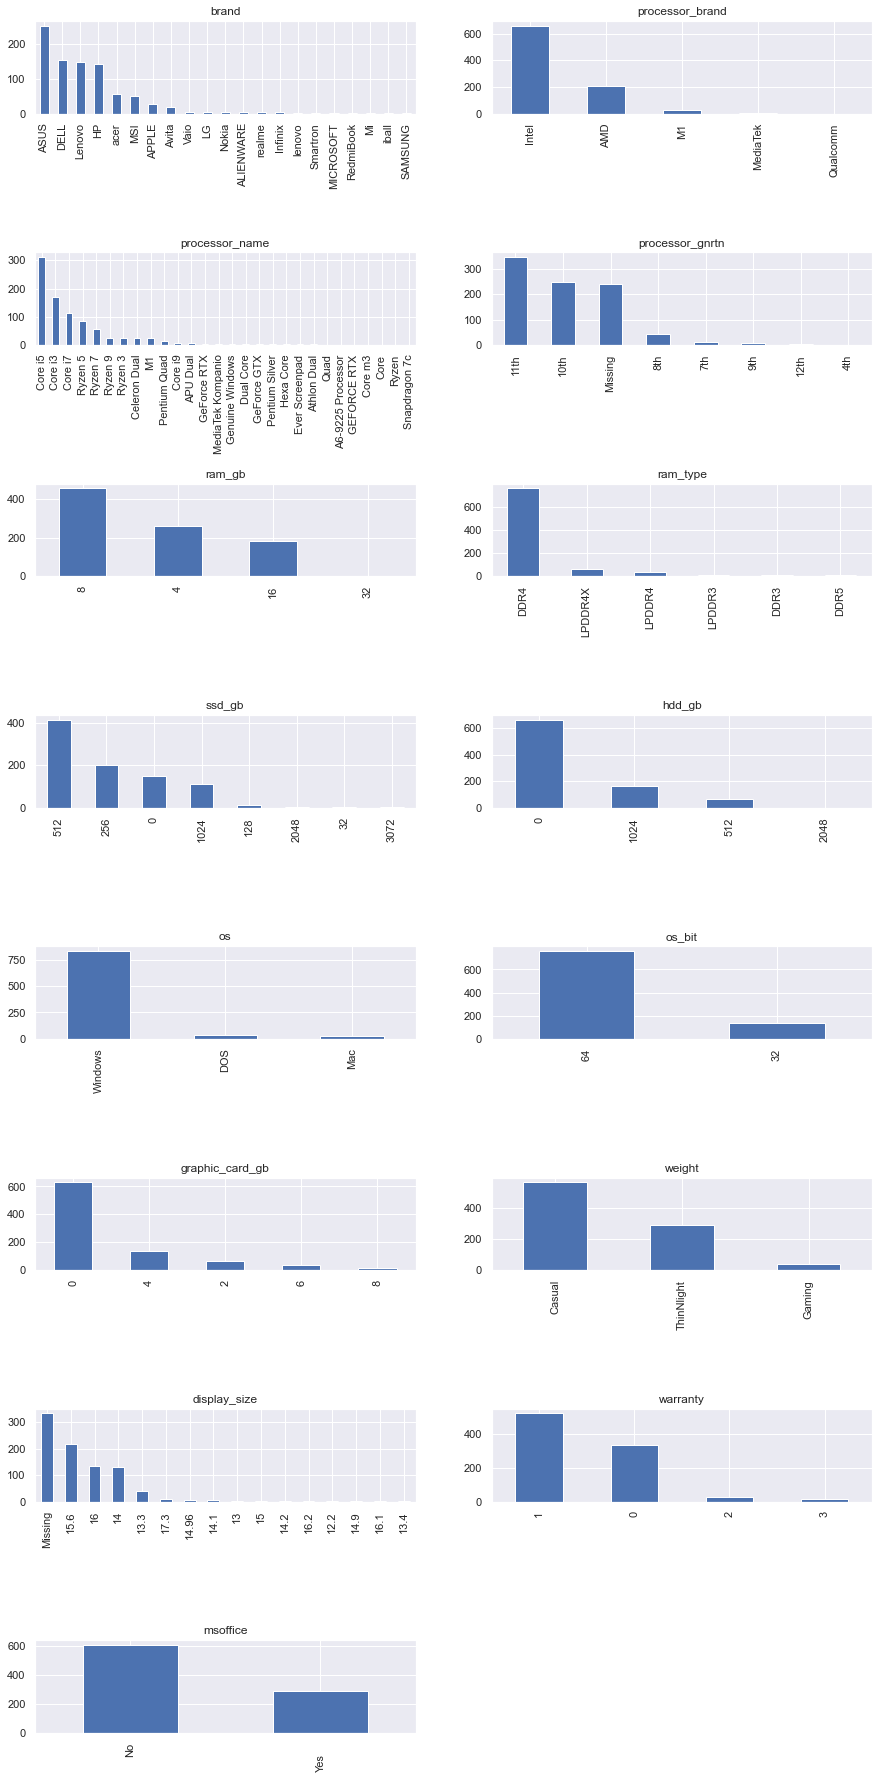

In [92]:
plt.figure(figsize = (15,40))
plt.subplots_adjust(hspace = 1.5)

    
for n, key in enumerate(laptop_string_counts):
    ax = plt.subplot(10,2,n+1)
    laptop_string_counts[key].plot(kind = 'bar', ax = ax, title = key)
    
for tick in ax.xaxis.get_major_ticks()[1::2]:
        tick.set_pad(15);

## Initial Impressions

The data is definitely not well distributed as we see some categories are quite imbalanced. This may be something we want to account for as we look into our model. This is a sign that perhaps clustering may be a good approach for our data as it allows us to look at the features grouped with each other and consider which features are the most important. 

Of concern is the amount of "missing" data points. We primarily see missing in `display_size` and `processor_gnrtn`. Both of these are pretty important features to consider for a laptop so it would be painful to drop these features entirely. It may be possible to look at how the data was scrapped and perhaps come up with a solution to fill in the missing data. Otherwise, the amount of data that is considered "Missing" is something we'll have to account for in our model.

Something like `msoffice` may not be useful as it is either "yes" or "no" and leaning heavily towards "no". `Warranty` data may be be looked at as binary "yes" or "no" as it might not matter how long the warranty is for our laptops.

Under the display_size, we see a range of numbers. I think that it would be best to round these sizes up or down to the nearest integer as some of these screen-size are very close to each other such as 13.3 and 13 and 14.1 and 14. 



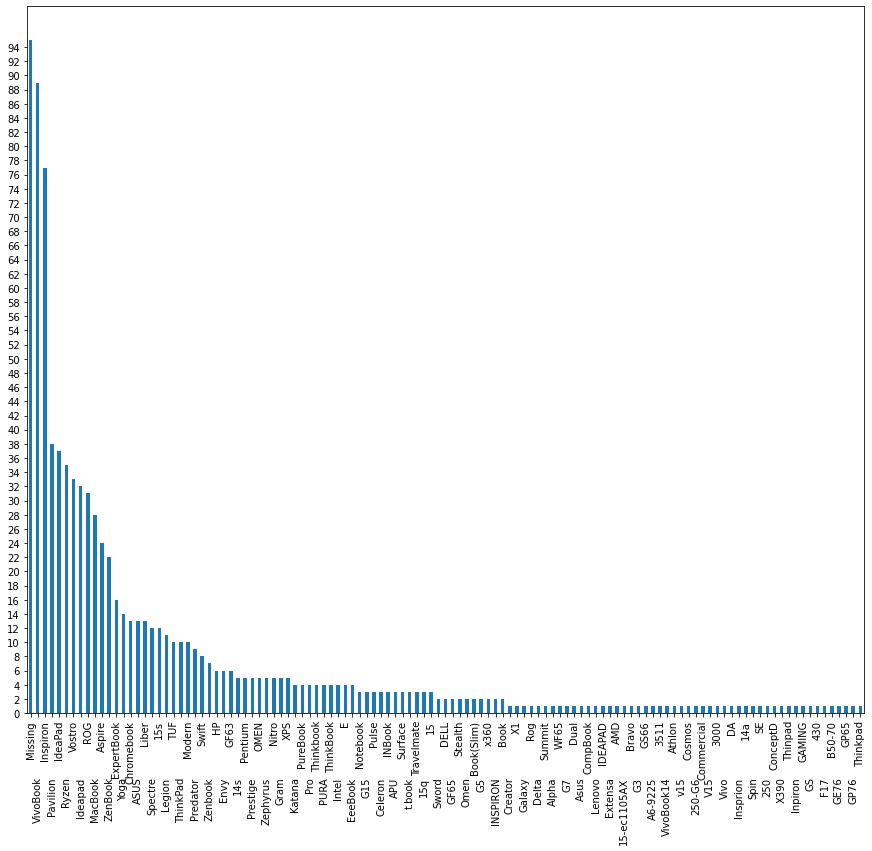

In [22]:
#Expanding on the barchart we want to look at the model breakdown

fig, ax = plt.subplots(figsize = (15,13))
laptop_string_counts['model'].plot(kind='bar', ax =ax)

for tick in ax.xaxis.get_major_ticks()[1::2]:
    tick.set_pad(60)
    
plt.yticks(np.arange(0,max(laptop_string_counts['model']),2));

## Numerical Interpretations

Lets look at some of the numerical information that is present in the data. 

Reminder that the following information has the type int: 
`ram`, `ssd_gb`, `hdd_gb`, `os_bit`, `graphic_card_gb`, `warranty`, `latest_price`.

We can first look at the distribution of prices overall as we did in the beginning.
We will then look at how each of the features compare in pricing ranges as box plots to get a feel for how much a certain feature may weigh up against the price.


In [34]:
laptop_df.describe()

,ram_gb,ssd_gb,hdd_gb,os_bit,graphic_card_gb,warranty,latest_price
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,8.531250,432.321429,226.857143,59.178571,1.198661,0.691964,992.028186
std,4.376055,316.118420,405.394129,11.453644,2.057454,0.606282,605.973607
min,4.000000,0.000000,0.000000,32.000000,0.000000,0.000000,181.870000
25%,4.000000,256.000000,0.000000,64.000000,0.000000,0.000000,591.370000
50%,8.000000,512.000000,0.000000,64.000000,0.000000,1.000000,825.422000
75%,8.000000,512.000000,512.000000,64.000000,2.000000,1.000000,1158.170000
max,32.000000,3072.000000,2048.000000,64.000000,8.000000,3.000000,5745.870000


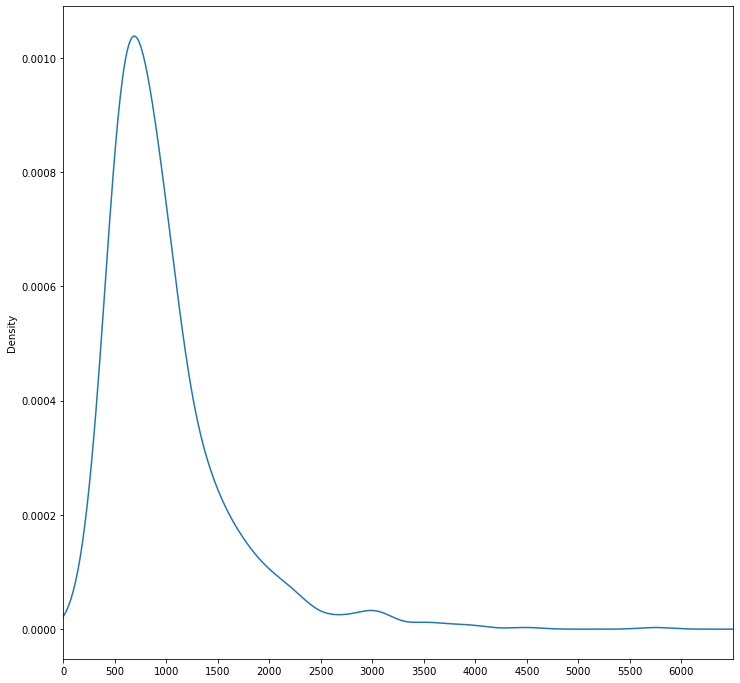

In [24]:
fig = plt.figure(figsize=(12,12))
laptop_df['latest_price'].plot(kind = 'density')
plt.xlim(0,6500)
plt.xticks(np.arange(0,6500,500));

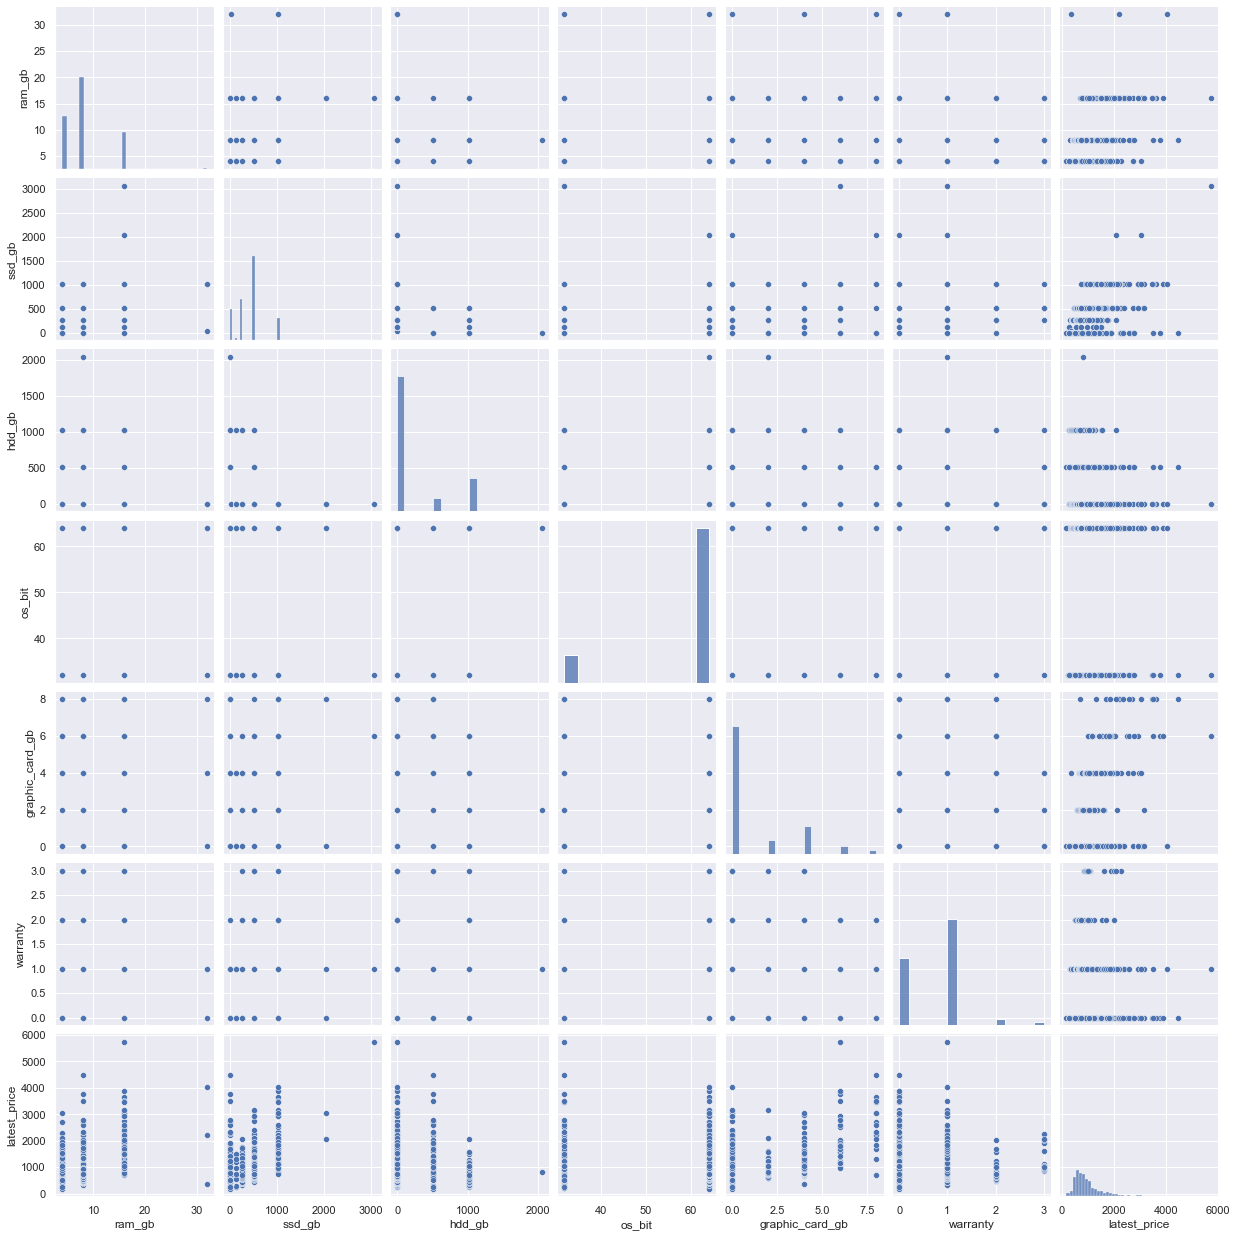

In [77]:
#Look at the pairplots, see if we can find any obvious correlations
_ = sns.pairplot(laptop_df)

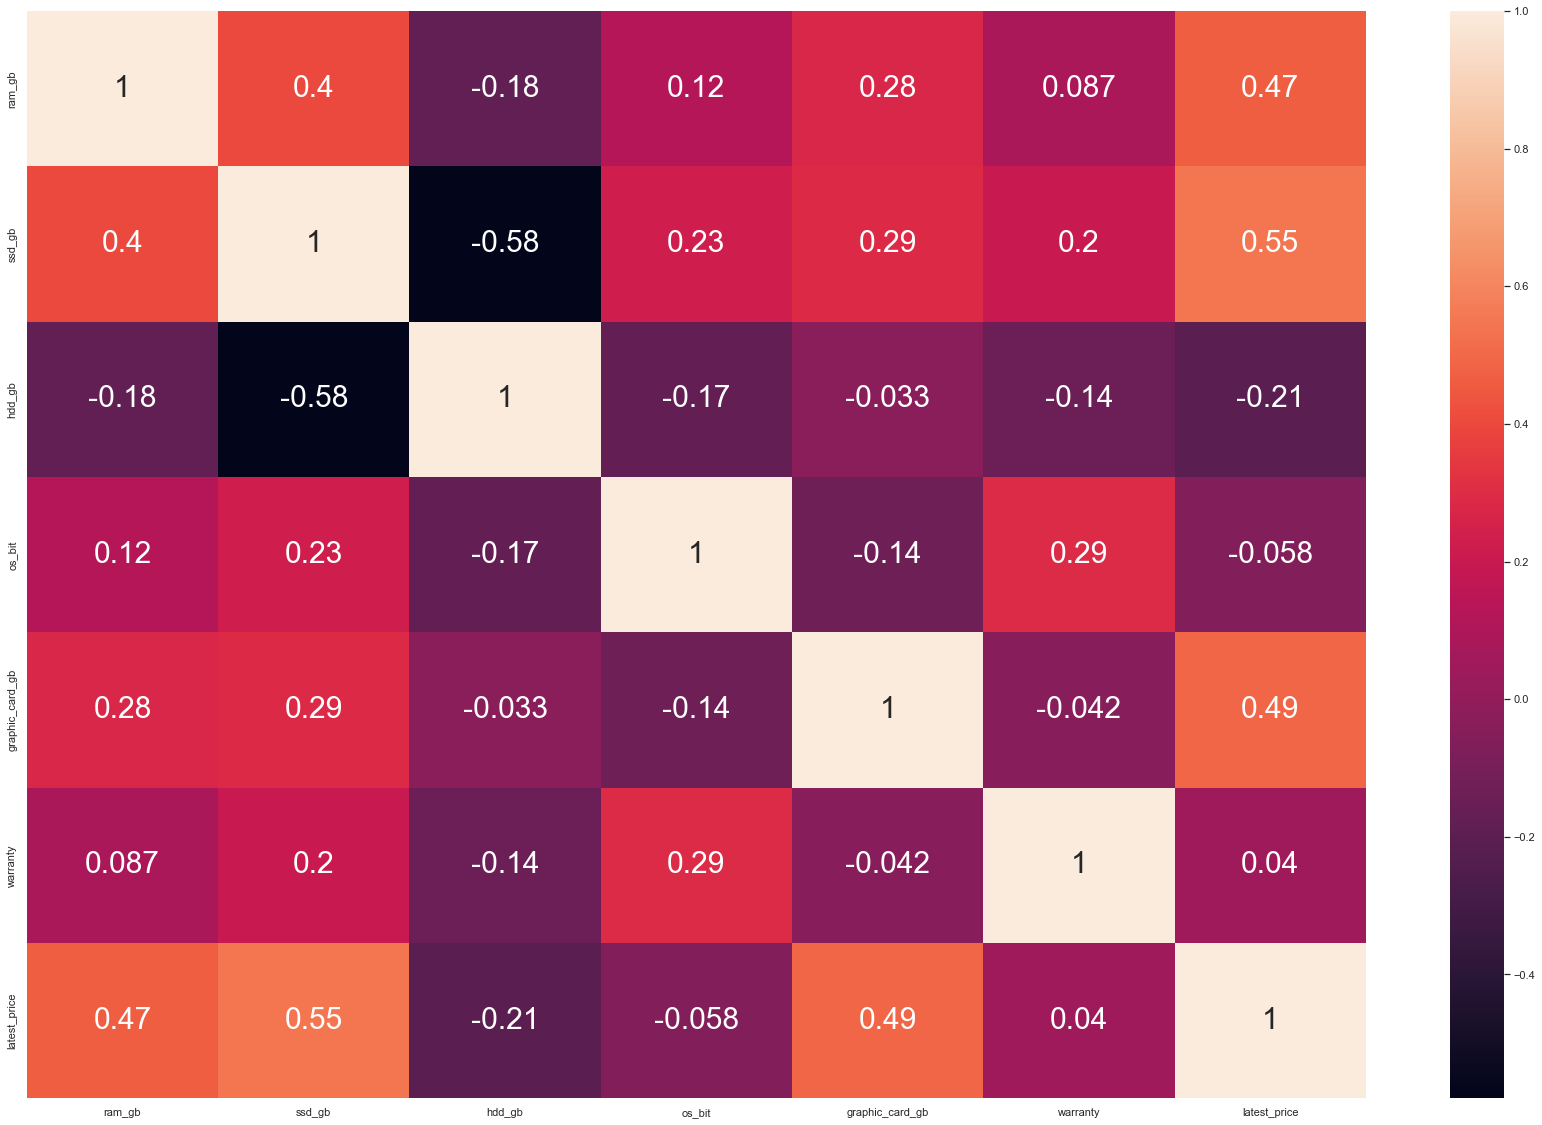

In [78]:
#Utilize heatmaps as another way of visualizing
plt.figure(figsize = (30,20))
sns.heatmap(laptop_df.corr(), annot=True, annot_kws={"fontsize":30});

In [25]:
#average price by brand
#Lets look at the average price by brand first and see what we get
laptop_brand_prices = laptop_df[['brand','latest_price']]
laptop_average_brand = laptop_brand_prices.groupby(by = 'brand').agg('mean')
laptop_average_brand.sort_values(by = 'latest_price', ascending = False)

,latest_price
brand,
ALIENWARE,3345.745000
APPLE,1972.202143
lenovo,1507.904667
MSI,1267.157750
MICROSOFT,1266.109000
ASUS,1029.882161
LG,990.470000
acer,938.916259
Lenovo,935.022892


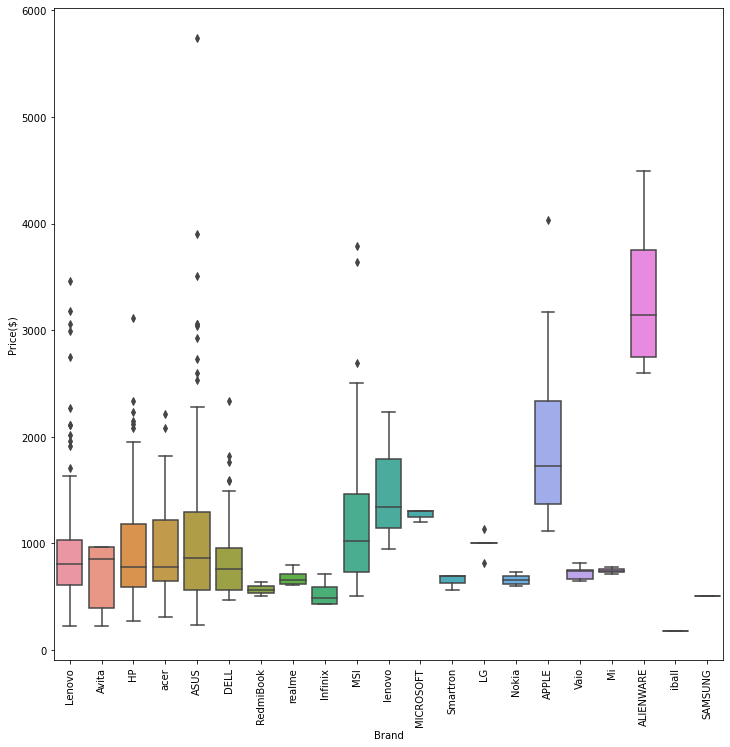

In [26]:
#Create barplot with the branding price that we created earlier. 
#This might give us some insight into how prices are distributed and some outliers to look out for.
plt.subplots(figsize=(12,12))
sns.boxplot(x='brand', y='latest_price', data = laptop_brand_prices)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price($)')
plt.xlabel('Brand');

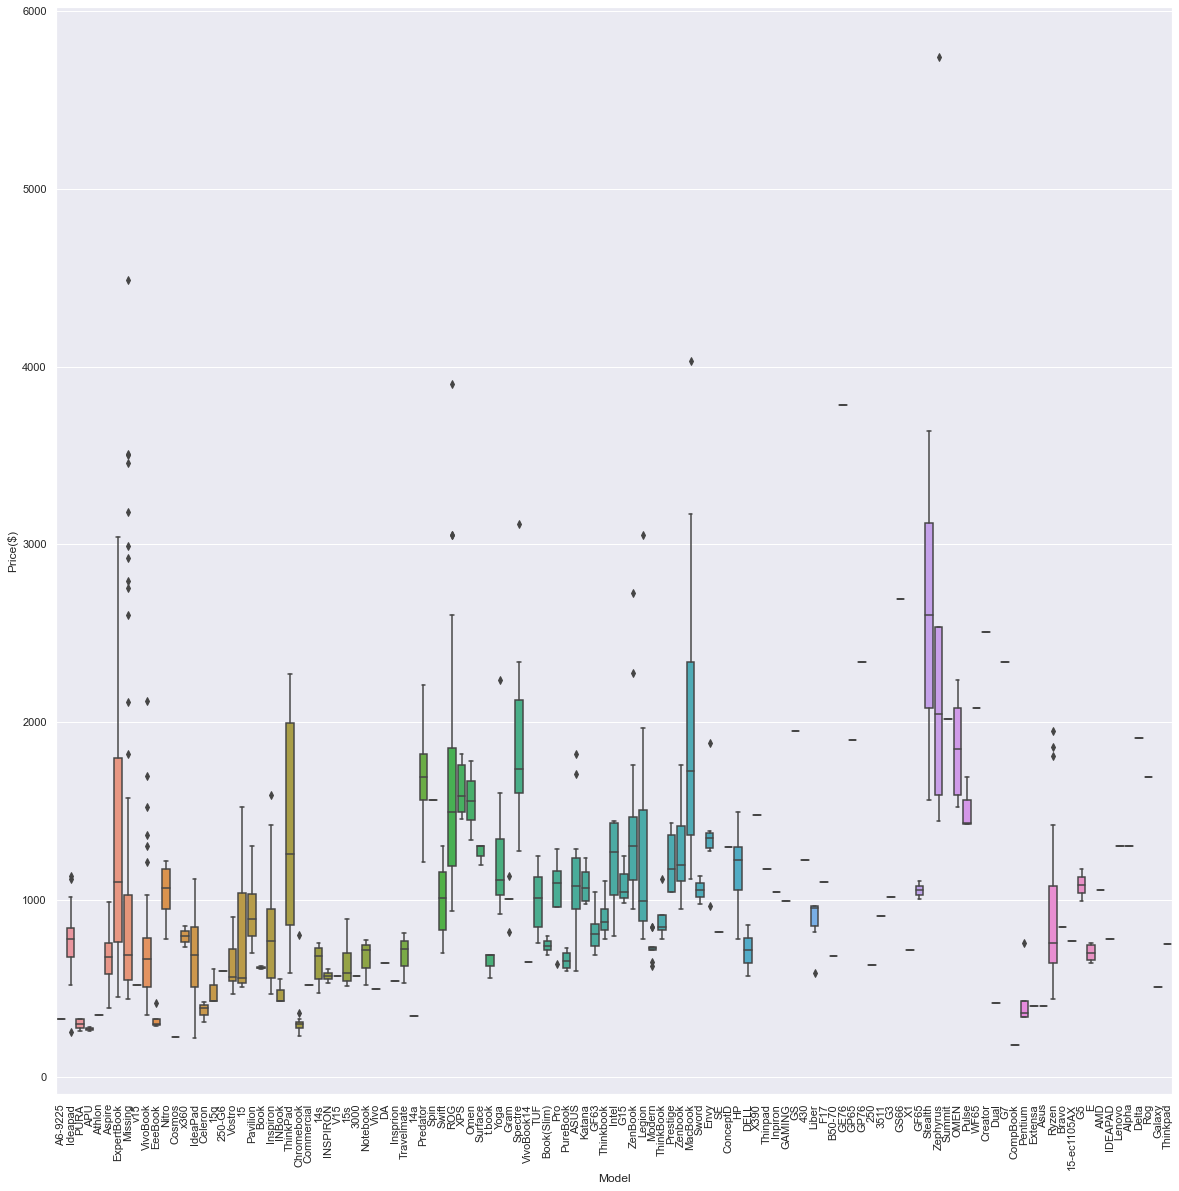

In [81]:
plt.subplots(figsize=(20,20))
sns.boxplot(x='model', y='latest_price', data = laptop_df)
plt.xticks(rotation = 'vertical')
plt.ylabel('Price($)')
plt.xlabel('Model');

In [29]:
#Re-Explore this outlier price
#There is only one laptop with a price greater than $5,000 so lets look at those specs.
laptop_df[laptop_df['latest_price'] > 5000]

,Unnamed: 0,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd_gb,hdd_gb,os,os_bit,graphic_card_gb,weight,display_size,warranty,msoffice,latest_price
636,636,ASUS,Zephyrus,Intel,Core i9,11th,16,DDR4,3072,0,Windows,32,6,Casual,Missing,1,No,5745.87


In [73]:
#We looked at brand and model so we can drop those, 
#We also drop latest price because we don't want to include that in our analysis
laptop_df_noprice = laptop_df.drop(['latest_price','brand', 'model'], axis = 1)

<Figure size 432x288 with 0 Axes>

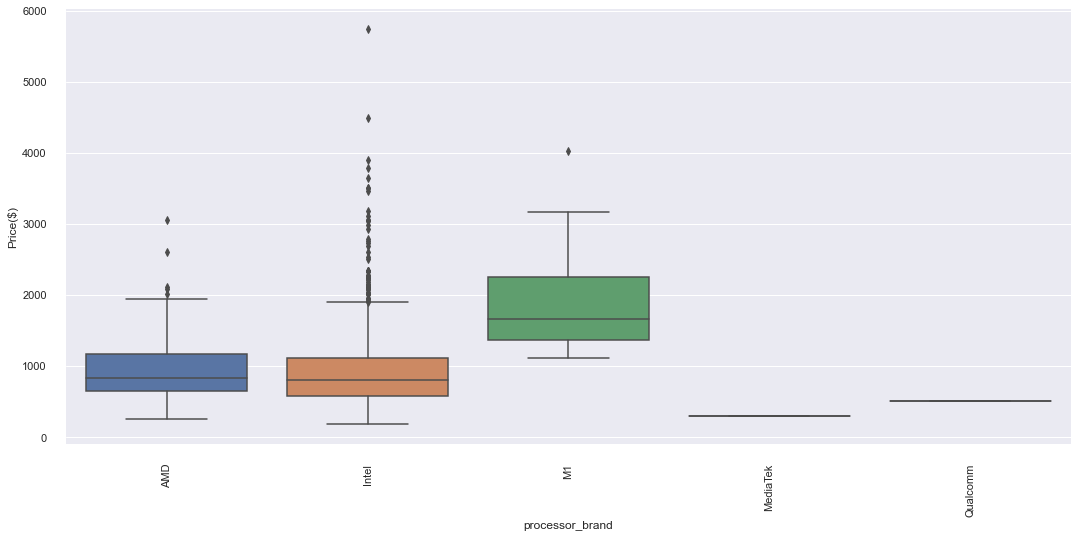

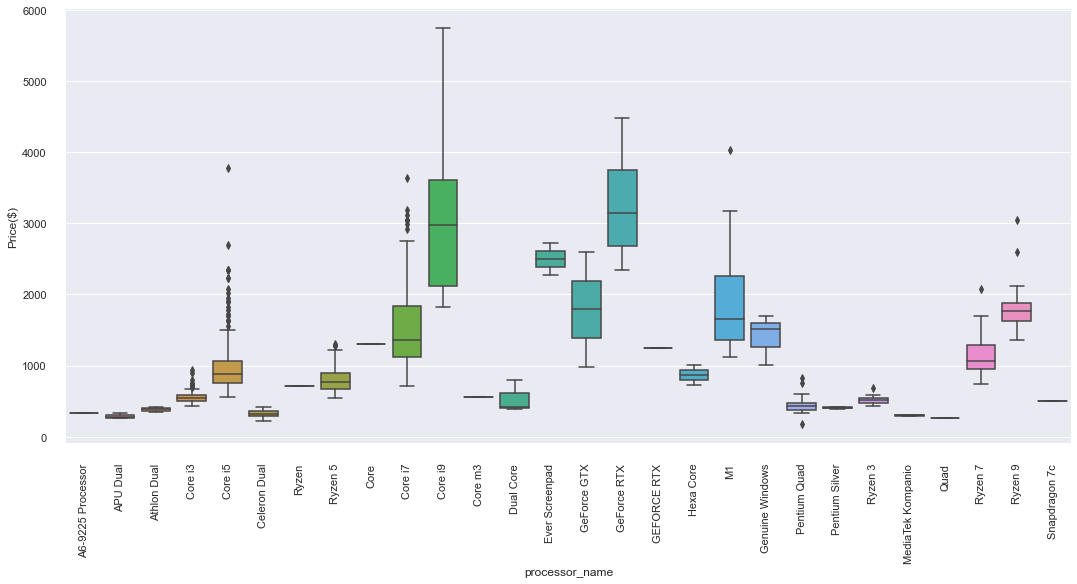

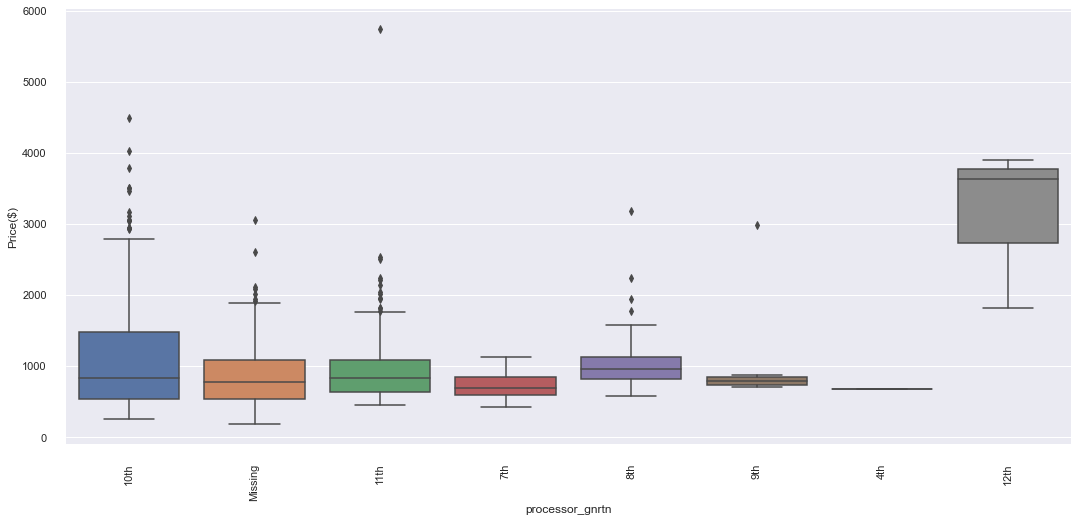

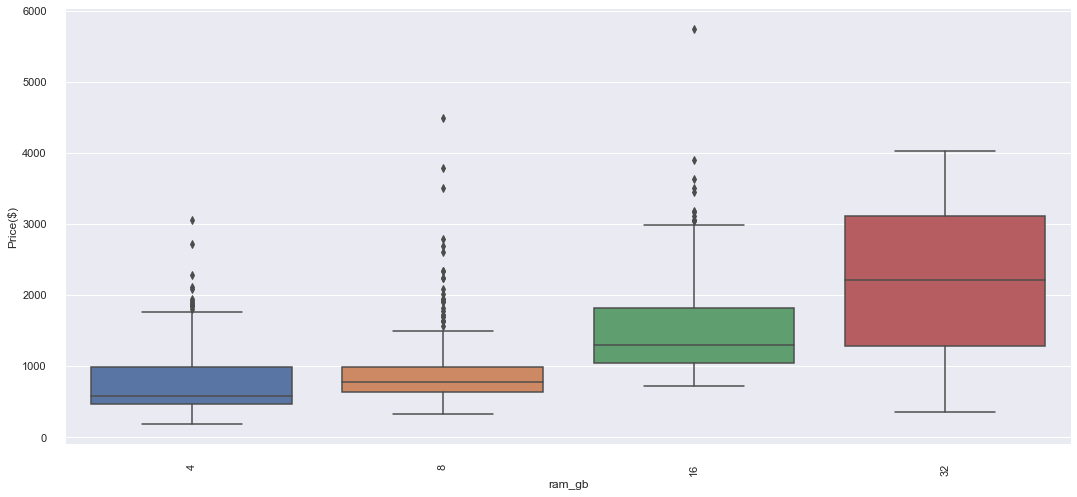

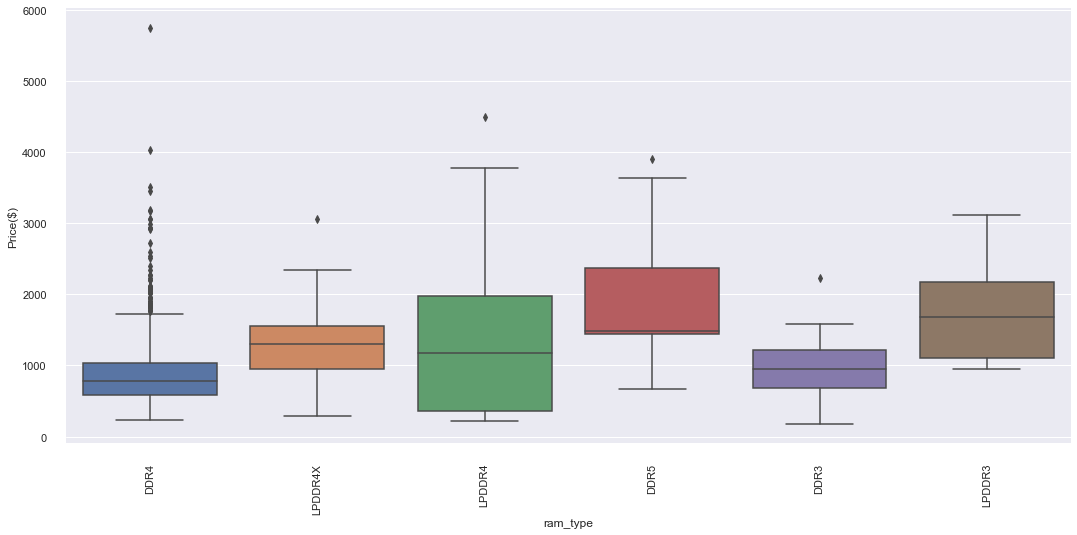

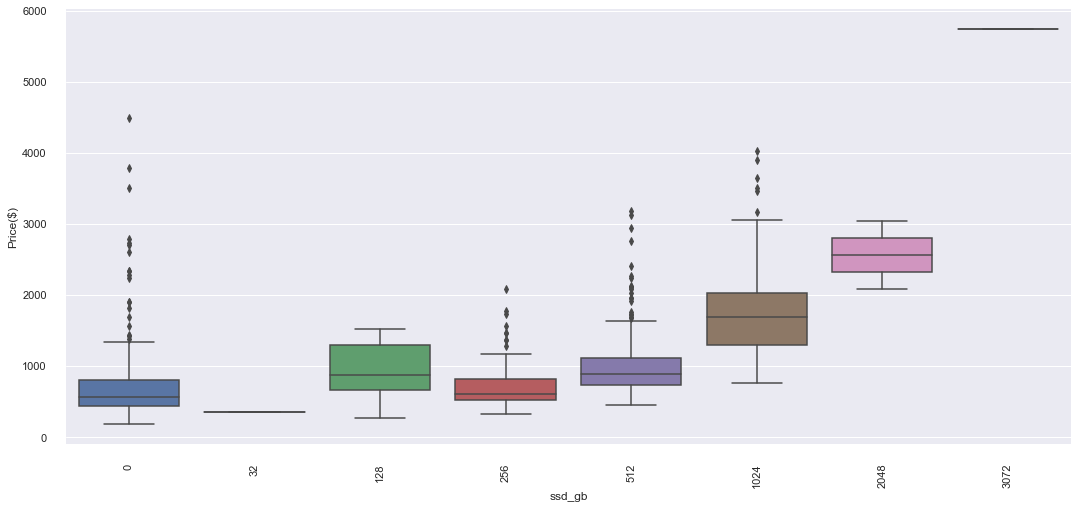

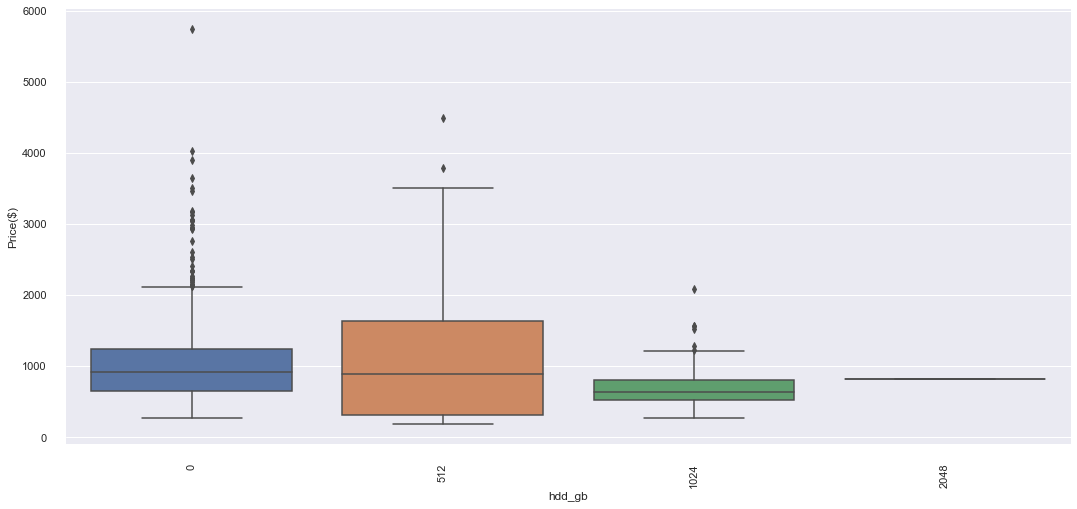

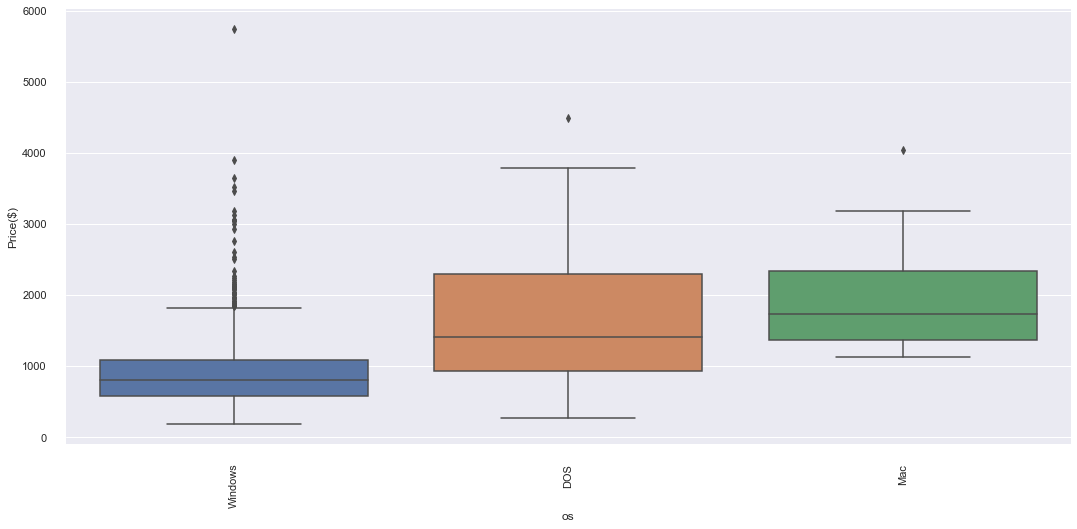

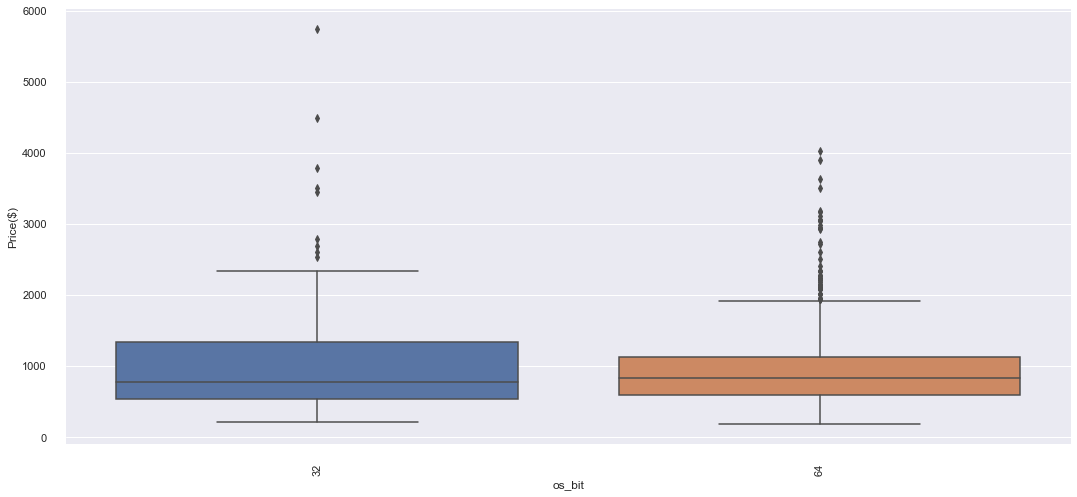

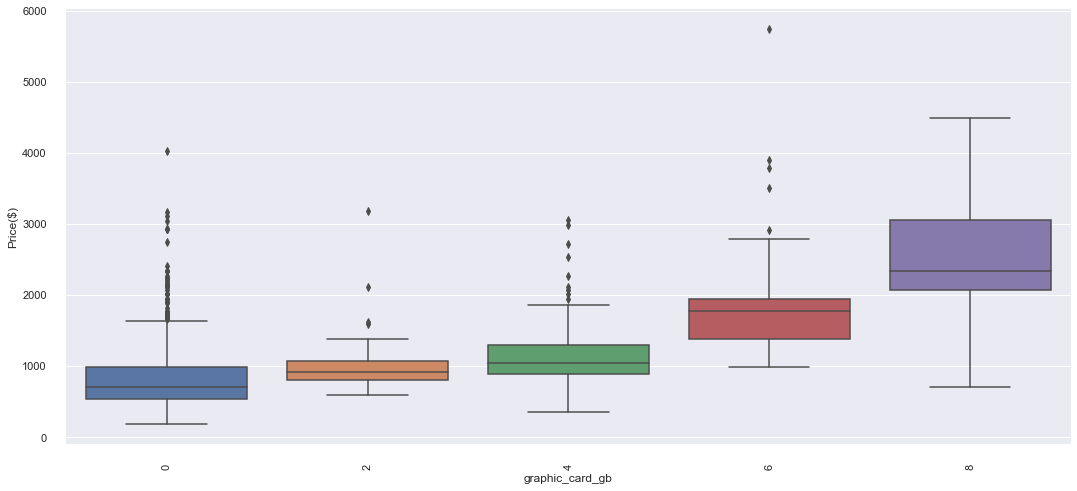

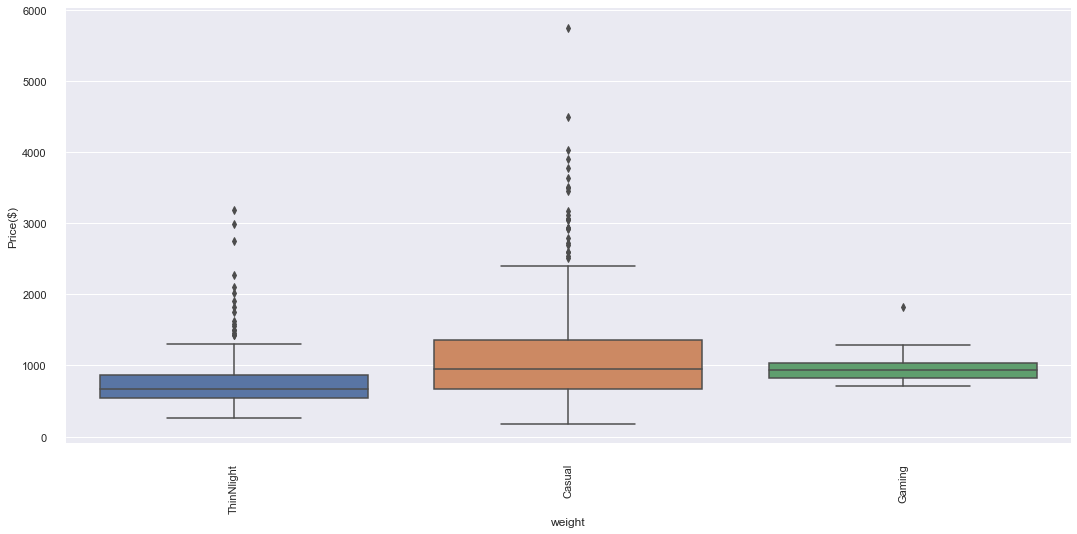

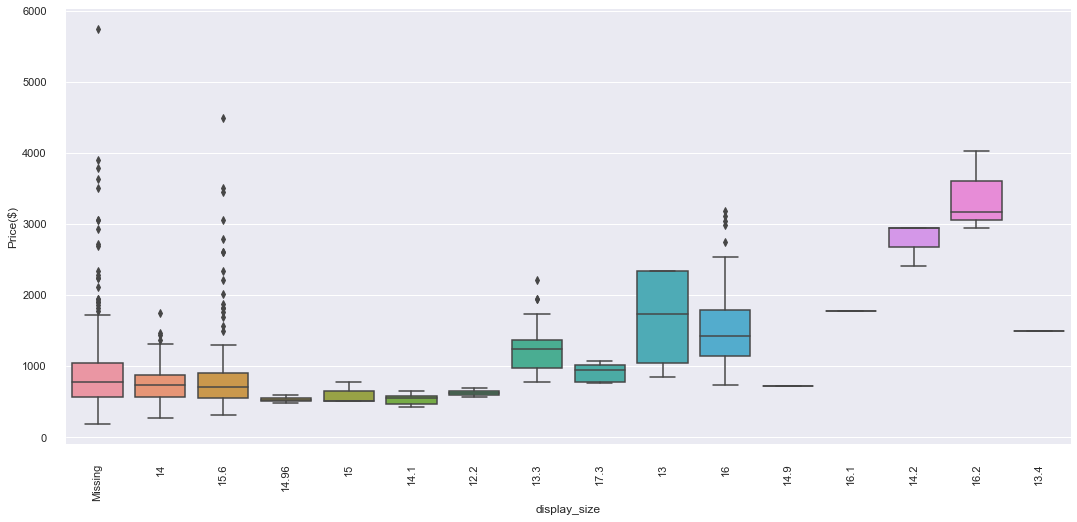

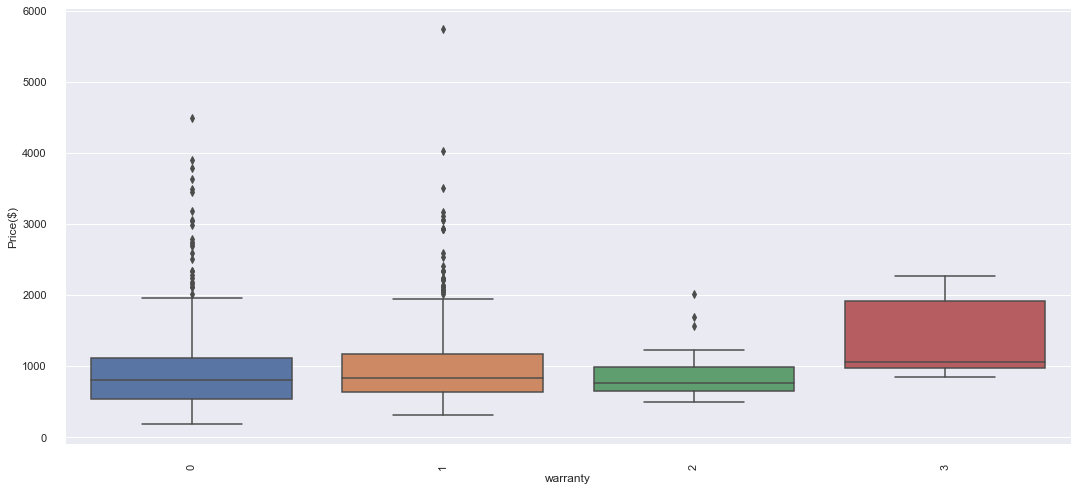

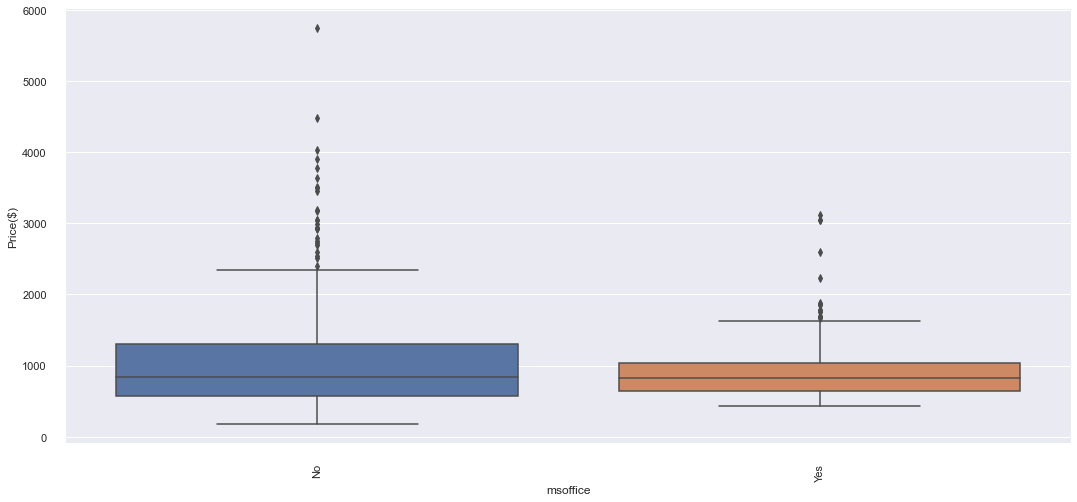

In [94]:
#Box plots for all columns
plt.subplots_adjust(hspace = 1.5)

laptop_cols_noprice = laptop_df_noprice.columns
    
for col in laptop_df_noprice.columns:
    sns.set()
    fig,ax = plt.subplots()
    sns.boxplot(x=col, y='latest_price', data = laptop_df)
    sns.despine(offset = 10, trim = True)
    fig.set_size_inches(18,8)
    plt.xticks(rotation = 'vertical')
    plt.ylabel('Price($)')
    plt.xlabel(col);

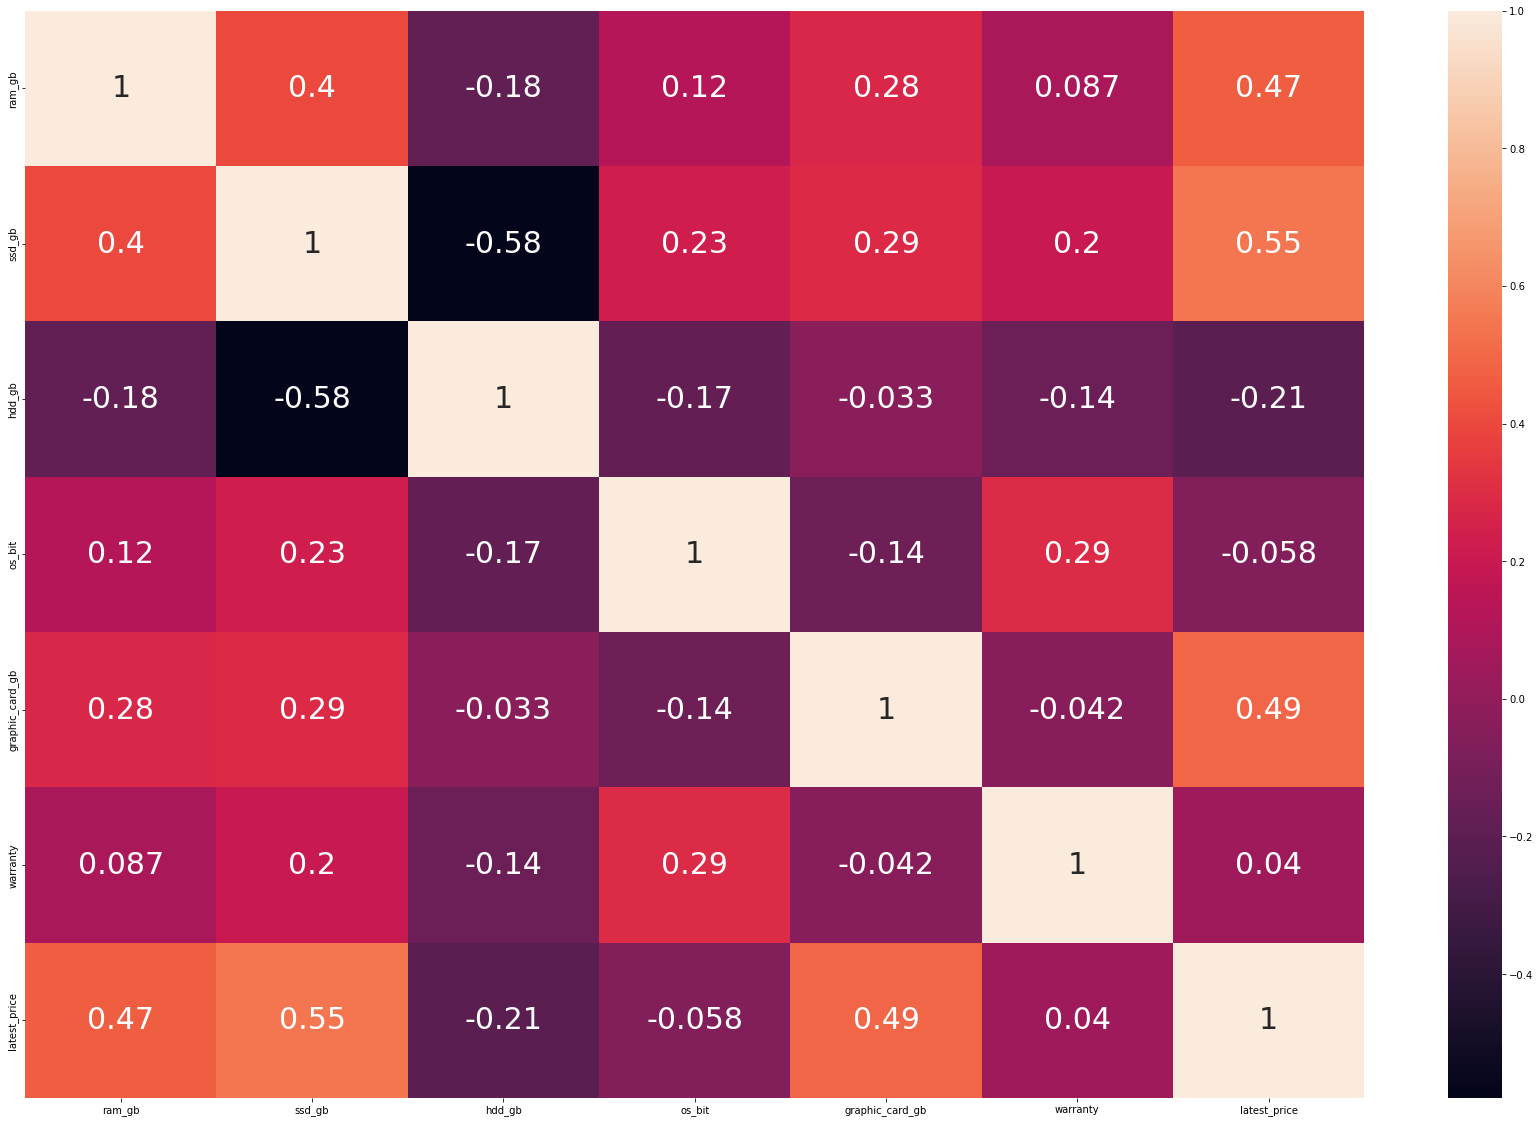